In [4]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 14.4 MB/s eta 0:00:00


In [5]:
import faiss
import numpy as np
from sentence_transformers import SentenceTransformer

# Load a pre-trained sentence transformer model
model = SentenceTransformer("all-MiniLM-L6-v2")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [6]:
import faiss
import numpy as np
import spacy
from sentence_transformers import SentenceTransformer

nlp = spacy.load("en_core_web_sm")
model = SentenceTransformer("all-MiniLM-L6-v2")


text = """
Alice was fascinated by her uncle, a beekeeper who spent hours tending to his beehives.
She loved watching the bees swarm around their hive, collecting nectar.
One day, her uncle told her about the importance of bees in pollination.
Alice realized how bees and flowers had a deep relationship.
"""




In [7]:
doc = nlp(text)
concepts = [token.text for token in doc if token.pos_ in ["NOUN", "PROPN"]]
print(f"Extracted Concepts: {concepts}")


embeddings = model.encode(concepts, normalize_embeddings=True)



Extracted Concepts: ['Alice', 'uncle', 'beekeeper', 'hours', 'beehives', 'bees', 'nectar', 'day', 'uncle', 'importance', 'bees', 'pollination', 'Alice', 'bees', 'flowers', 'relationship']


In [9]:
dimension = embeddings.shape[1]
print(dimension)
index = faiss.IndexFlatL2(dimension)
index.add(embeddings)



384


In [10]:
def find_associations(query):
    query_vector = model.encode([query], normalize_embeddings=True)
    distances, indices = index.search(query_vector, 3)
    return [(concepts[i], distances[0][idx]) for idx, i in enumerate(indices[0])]




In [13]:
queries = ["beekeeper", "hive", "pollination"]
for query in queries:
    matches = find_associations(query)
    print(f"\nQuery: {query}")
    for match, distance in matches:
        print(f"  Related Concept: {match} (Distance: {distance:.4f})")


Query: beekeeper
  Related Concept: beekeeper (Distance: 0.0000)
  Related Concept: beehives (Distance: 0.5983)
  Related Concept: bees (Distance: 0.6470)

Query: hive
  Related Concept: bees (Distance: 0.9137)
  Related Concept: bees (Distance: 0.9137)
  Related Concept: bees (Distance: 0.9137)

Query: pollination
  Related Concept: pollination (Distance: 0.0000)
  Related Concept: bees (Distance: 0.8492)
  Related Concept: bees (Distance: 0.8492)


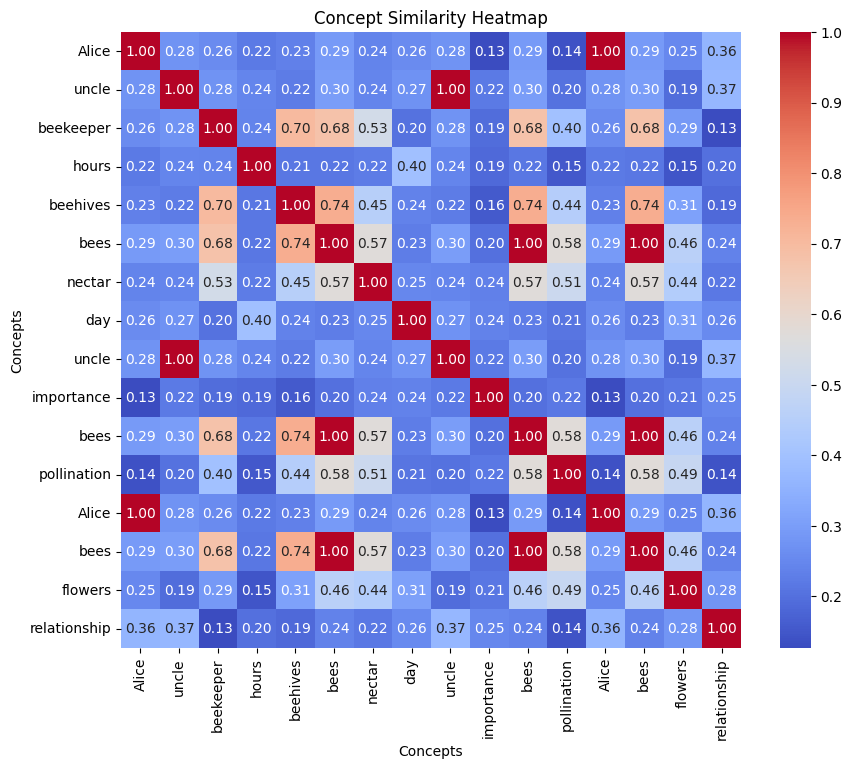

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# Compute similarity matrix
similarity_matrix = np.matmul(embeddings, embeddings.T)

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, xticklabels=concepts, yticklabels=concepts, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Concept Similarity Heatmap")
plt.xlabel("Concepts")
plt.ylabel("Concepts")
plt.show()

Extracted Concepts: ['Alice', 'uncle', 'beekeeper', 'hours', 'beehives', 'bees', 'beehives', 'bees', 'nectar', 'day', 'uncle', 'importance', 'bees', 'pollination', 'Alice', 'bees', 'flowers', 'relationship', 'Birds', 'nests', 'eggs']

Birds live in nests : bees live in bees
